### Introduction to A/B Testing

A/B Testing is a statistical way of **comaring two or more variants**, such as Version A or Version B.
<br>To determine not only which version performs better but also to understand if a difference between two versions is statistically significant.<br>

<u>Control and treatment groups:</u>
* **Control:** The current state of your product
* **Treatment(s):** The variant(s) that you want to tset

<u>The importance of randomness:</u>
* Random assignment helps to:
    * Isolate the impact of the change made.
    * Reduce the potential impact of confounding varaibles.
* Using an assignment criteria may introduce confounders.

<u>Good problems for A/B testing:</u>
* Users are impacted individually
* Testing changes that can directly impact their behavior

<u>Bad problems for A/B testing:</u>
* Cases with network effects among users
    * Challenging to segment the users into groups
    * Difcult to untangle the impact ofthe test
    
<hr>

At this A/B Testing, we will compare between 2 different designs of a website page, and try to understand if the new one is better, worst, or has no difference from the old one.


Before rolling out the change, the team would be more comfortable testing it on a small number of users to see how it performs, so you suggest running an A/B test on a subset of your user base users.

Data set reference: https://www.kaggle.com/zhangluyuan/ab-testing/version/1



<u>Columns:</u>

* **user_id**
* **timestamp -** range [2/1/2017, 24/1/2017]
* **group -** control/treatment
* **landing_page -** old page/new page
* **converted -**  0 - The user did not buy the product during this user session, 1 - The user bought the product during this user session 

                   
<hr>

<u>Steps:</u>
1. Designing our experiment.
2. Collecting and preparing the data.
3. Visualising the results.
4. Testing the hypothesis.
5. Drawing conclusions.

### 1. Designing our experiment

#### <u>Formulating a hypothesis</u>

The first thing to do, this will make sure our interpretation of the results is correct as well as rigorous.

Given we don’t know if the new design will perform better or worse (or the same?) as our current design, we’ll choose a **two-tailed test**.

- <u>two-tailed test - Definition:</u> A two-tailed hypothesis test is designed to show whether the sample mean is significantly greater than and significantly less than the mean of a population. The two-tailed test gets its name from testing the area under both tails (sides) of a normal distribution


Hₒ: p = pₒ <br>
Hₐ: p ≠ pₒ


where p and pₒ stand for the conversion rate of the new and old design, respectively. We’ll also set a **confidence level** of 95%.

- <u>confidence level - Definition:</u>In statistics, the confidence level indicates the probability, with which the estimation of the location of a statistical parameter (e.g. an arithmetic mean) in a sample survey is also true for the population.

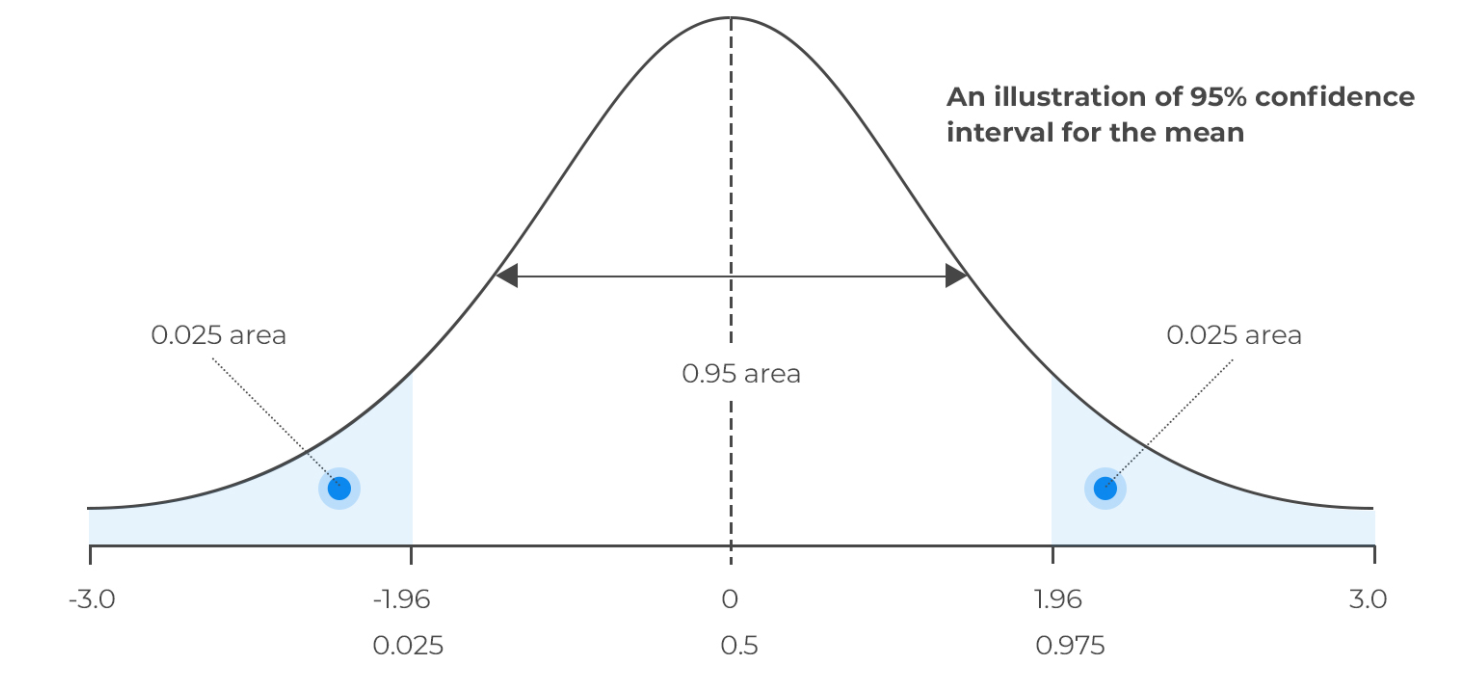

Alpha sets the standard for how extreme the data must be **before** we can reject the null hypothesis. The p-value indicates how extreme the data **are**.

Lets take a **confidence level is 95%**,hence our **significant level is α = 0.05** and at **each tail will be 0.025 - 2.5%** (0.5/2).<br>
When using a two-tailed test, regardless of the direction of the relationship you hypothesize, you are testing for the possibility of the relationship in both directions. <br>

The α value is a threshold we set, by which we say “if the probability of observing a result as extreme or more (p-value) is lower than α, then we reject the Null hypothesis”.

The **p-value** tells us how likely it is to get a result like this or more rare if the Null Hypothesis is true.

- A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.
- A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. **You should note that you cannot accept the null hypothesis, we can only reject the null or fail to reject it.**

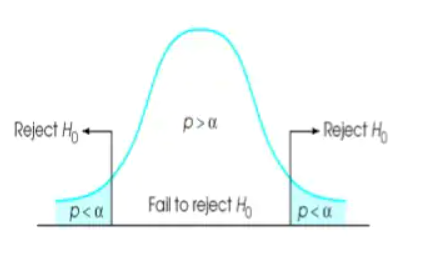

all this really means is that whatever conversion rate we observe for our new design in our test, we want to be 95% confident it is statistically different from the conversion rate of our old design, before we decide to reject the Null hypothesis Hₒ.

#### <u>Choosing the varaibles</u>
Our two groups will be:
* A control group - They'll be shown the old design
* A treatment (or experimental) group - They'll be shown the new design

This will be our **Independent Variable.**

For our **Dependent Variable** (i.e. what we are trying to measure), we are interested in capturing the conversion rate. A way we can code this is by each user session with a binary variable:
* 0 - The user did not buy the product during this user session
* 1 - The user bought the product during this user session

#### <u>Choosing a sample size<u/>

The number of people (or user sessions) we decide to capture **in each group** will have an effect on the precision of our estimated conversion rates: the larger the sample size, the more precise our estimates (i.e. the smaller our confidence intervals), the higher the chance to detect a difference in the two groups, if present.<br>
On the other hand, the larger our sample gets, the more expensive (and impractical) our study becomes.
    
- <u>Power of a test - Definition:</u> The statistical power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when a specific alternative hypothesis is true.    
    
The sample size we need is estimated through something called **Power analysis**, and it depends on a few factors:
* **Power of the test** (1 — β) — This represents the probability of finding a statistical difference between the groups in our test when a difference is actually present. This is usually set at 0.8 by convention.
* **Alpha value** (α) — The critical value we set earlier to 0.05.
* **Effect size** — How big of a difference we expect there to be between the conversion rates.

    
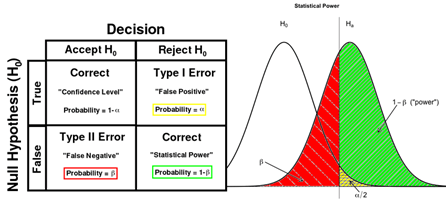
    
- <u>Conversion Rate - Definition:</u> What is a conversion rate? The conversion rate is the number of conversions divided by the total number of visitors. For example, if an ecommerce site receives 200 visitors in a month and has 50 sales, the conversion rate would be 50 divided by 200, or 25%.
    
*Lets assume that the current conversion rate is about 13% on average throughout the year, and that the team would be happy with an increase of 2%, meaning that the new design will be considered a success if it raises the conversion rate to 15%.*
    
Since our team would be happy with a difference of 2%, we can use 13% and 15% to calculate the effect size we expect.
    
Having set the power parameter to 0.8 in practice means that if there exists an actual difference in conversion rate between our designs, assuming the difference is the one we estimated (13% vs. 15%), we have about 80% chance to detect it as statistically significant in our test with the sample size we calculated.
    
**Sample size function:**

In [1]:
import scipy.stats as stats
import statsmodels.stats.api as sms
from math import ceil

effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates
print("the effect size is: ",effect_size)
required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

the effect size is:  -0.0576728617308947
4720


### 2. Collecting and preparing the data

In [2]:
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd

df = pd.read_csv('ab_data.csv')

In [4]:
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
# let's check the number of user at each design
df.landing_page.value_counts()

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

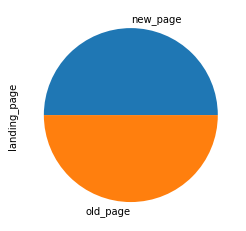

In [7]:
df.landing_page.value_counts().plot(kind='pie')

In [8]:
# To make sure all the control group are seeing the old page and viceversa
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


For our analysis, we need to use only the **group** and **converted** columns.

Before we go ahead and sample the data to get our subset, let’s make sure there are no users that have been sampled multiple times.

In [9]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 3894 users that appear multiple times in the dataset


There are, in fact, 3894 users that appear more than once. Since the number is pretty low, we’ll go ahead and remove them from the DataFrame to avoid sampling the same users twice.

In [10]:
df[df.duplicated(['user_id'])]
print(df[df.duplicated(['user_id'])].shape[0])


# Another way:
"""
users_to_drop = session_counts[session_counts > 1].index
len(users_to_drop)
"""

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


3894


'\nusers_to_drop = session_counts[session_counts > 1].index\nlen(users_to_drop)\n'

In [11]:
df = df.drop_duplicates(subset=['user_id'], keep=False) #False - Remove any duplicate row
df.shape[0]

286690

#### Sampling

**Reminder:** Our required sample is 4720 in each group.<br>
We will use *DataFrame.sample()* Method. (Return a random sample of items from an axis of object)



In [12]:
control_sample = df[df['group'] == 'control'].sample(n=required_n)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n)

AB_testing_df = pd.concat([control_sample, treatment_sample])
AB_testing_df

AB_testing_df.reset_index(drop=True, inplace=True)
# inplace: bool, default False 
# Modify the DataFrame in place (do not create a new object).
AB_testing_df

,user_id,timestamp,group,landing_page,converted
211964,886787,2017-01-13 16:56:08.129625,control,old_page,0
32897,649486,2017-01-23 03:51:08.570439,control,old_page,0
164285,638603,2017-01-17 00:12:13.157838,control,old_page,0
262169,922541,2017-01-12 01:07:22.382680,control,old_page,0
102480,812162,2017-01-13 07:33:35.194521,control,old_page,1
...,...,...,...,...,...
187575,675783,2017-01-19 13:14:22.369061,treatment,new_page,0
109591,832952,2017-01-06 14:18:44.428802,treatment,new_page,0
102900,787534,2017-01-08 16:23:12.555846,treatment,new_page,0
218325,706355,2017-01-14 06:49:53.262355,treatment,new_page,0


,user_id,timestamp,group,landing_page,converted
0,886787,2017-01-13 16:56:08.129625,control,old_page,0
1,649486,2017-01-23 03:51:08.570439,control,old_page,0
2,638603,2017-01-17 00:12:13.157838,control,old_page,0
3,922541,2017-01-12 01:07:22.382680,control,old_page,0
4,812162,2017-01-13 07:33:35.194521,control,old_page,1
...,...,...,...,...,...
9435,675783,2017-01-19 13:14:22.369061,treatment,new_page,0
9436,832952,2017-01-06 14:18:44.428802,treatment,new_page,0
9437,787534,2017-01-08 16:23:12.555846,treatment,new_page,0
9438,706355,2017-01-14 06:49:53.262355,treatment,new_page,0


In [13]:
AB_testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       9440 non-null   int64 
 1   timestamp     9440 non-null   object
 2   group         9440 non-null   object
 3   landing_page  9440 non-null   object
 4   converted     9440 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 368.9+ KB


In [14]:
AB_testing_df.group.value_counts()

control      4720
treatment    4720
Name: group, dtype: int64

<u>Information about conversion according date and group:</u>

### 3. Visualising the results

- <u>Standard Error of a Proportion - Definition: </u>The standard error of a proportion is a statistic indicating how greatly a particular sample proportion is likely to differ from the proportion in the population proportion

In [15]:
import math

n = AB_testing_df[(AB_testing_df["group"] == 'treatment')].shape[0] # Or control, it is the same

control_converted_conversion_rate = AB_testing_df[(AB_testing_df["group"] == 'control')].converted.mean()
treatment_converted_conversion_rate = AB_testing_df[(AB_testing_df["group"] == 'treatment')].converted.mean()

control_converted_std = AB_testing_df[(AB_testing_df["group"] == 'control')].converted.std()
treatment_converted_std = AB_testing_df[(AB_testing_df["group"] == 'treatment')].converted.std()

control_converted_sem = AB_testing_df[(AB_testing_df["group"] == 'control')].converted.std() / math.sqrt(n)
treatment_converted_sem = AB_testing_df[(AB_testing_df["group"] == 'treatment')].converted.std() / math.sqrt(n)


#Another way:
"""
import numpy as np

conversion_rates = AB_testing_df.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')
"""

"\nimport numpy as np\n\nconversion_rates = AB_testing_df.groupby('group')['converted']\n\nstd_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion\nse_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))\n\nconversion_rates = conversion_rates.agg([np.mean, std_p, se_p])\nconversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']\n\n\nconversion_rates.style.format('{:.3f}')\n"

In [16]:
stats_dict = {'conversion_rate': [control_converted_conversion_rate, treatment_converted_conversion_rate],
             'std_deviation': [control_converted_std, treatment_converted_std],
             'std_error': [control_converted_sem, treatment_converted_sem]}
stats_df = pd.DataFrame(stats_dict, index = ['control', 'treatment'])
stats_df

,conversion_rate,std_deviation,std_error
control,0.123729,0.329307,0.004793
treatment,0.123517,0.329065,0.004790


Judging by the stats above, it does look like our two designs performed very similarly, with our old design performing slightly better, approx. 12.37% vs. 12.35% conversion rate.

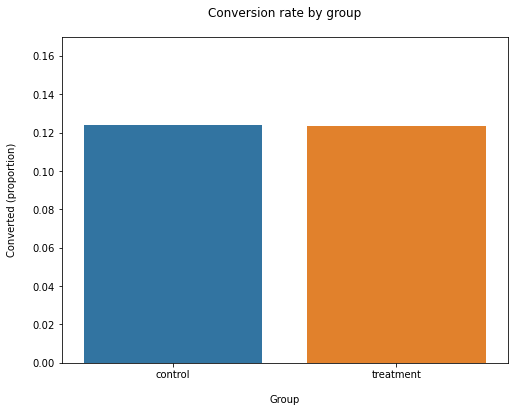

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(8,6))

sns.barplot(x=AB_testing_df['group'], y=AB_testing_df['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

Note that the conversion rate of the control group is lower than what we would have expected given what we knew about our avg. conversion rate (12.37% vs. 13%). This goes to show that there is some variation in results when sampling from a population.

### 4. Testing the hypothesis

Since we have a very large sample, we can use the normal approximation for calculating our p-value. Assume Standard Diviation is known, hence we will chose **Two-tailed Z-test**.

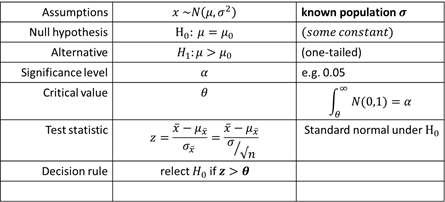

In [18]:
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats

alpha=0.05
n_sided = 2 # 2-sided test
z_crit = stats.norm.ppf(1-alpha / n_sided)
print("Critical value is: ",z_crit) # 1.959963984540054

control_results = AB_testing_df[(AB_testing_df["group"] == 'control')].converted
treatment_results = AB_testing_df[(AB_testing_df["group"] == 'treatment')].converted

z_statistic, p_value = ztest(control_results, treatment_results)
print("z-statistic is: ", z_statistic)
print("p-value is: ", p_value)

Critical value is:  1.959963984540054
z-statistic is:  0.031266053653148836
p-value is:  0.975057362425315


Calculate **Confidence Interval** for each group:

In [19]:
import scipy.stats as st
import numpy as np

(lower_con, upper_con) = st.t.interval(alpha=0.95, df=len(control_results)-1, loc=np.mean(control_results), scale=st.sem(control_results))
(lower_treat, upper_treat) = st.t.interval(alpha=0.95, df=len(treatment_results)-1, loc=np.mean(treatment_results), scale=st.sem(treatment_results))

# sem - Std. error of the proportion (std / sqrt(n))

print(f'Confidence Interval 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Confidence Interval 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

Confidence Interval 95% for control group: [0.114, 0.133]
Confidence Interval 95% for treatment group: [0.114, 0.133]


<u>**Conclusion:**</u>

<u>**The decision rule is:**</u>
* Reject Hₒ if z-statistic = 0.0312 < Critical value = -1.959 or if z-statistic = 0.0312 > Critical value = 1.959 ---> So we don't reject Hₒ.
* Reject Hₒ if p-value = 0.975 ≤ alpha = 0.05 ---> So we don't reject Hₒ.

Additionally, if we look at the confidence interval for the treatment group [0.114, 0.133], or 11.4-13.3%) we notice that:
* It includes our baseline value of 13% conversion rate.
* It does not include our target value of 15% (the 2% uplift we were aiming for).

<u>**Sign Test:**</u>

Another test to consider when picking a winner in an A/B test is a sign test - checking the trend of change we observe by day. If we check how many days the conversion was higher in the Treatment vs the New, we can use this as our number of successes for our binomial distribution. The null hypothesis of the sign test is that the population median is equal to some value  M  - implying the observations greater than  M  (denoted by  r+ ) are equal to the observations less than  M  (denoted by  r− ).

Therefore, the Null Hypothesis is:  r+,r−∼Bin(n,p)  where  p=12  (Shier, 2004).

Note that we are only concerning ourselves with the number of days (observations) that the conversion was higher for Treatment > number of days that the conversion was higher for Control. Therfore, this will be a one-sided test and we'll divide the p-value by 2.

In [20]:
# Building out another dataframe that will be useful in a sign test:
dfsign = df[['timestamp','group','converted']]

# Timestamp is a concatenation of date + exact time of user landing on the page. We only want the date, or 1st 10 characters:
dfsign['timestamp'] = df['timestamp'].astype(str).str[:10]

# Grouping by timestamp and group will sum all the conversions for a group on a given day:
dfsign2 = dfsign.groupby(['timestamp','group']).sum().reset_index()
dfsign2.head(20)

<ipython-input-20-dbf04089177f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsign['timestamp'] = df['timestamp'].astype(str).str[:10]


,timestamp,group,converted
0,2017-01-02,control,354
1,2017-01-02,treatment,336
2,2017-01-03,control,738
3,2017-01-03,treatment,745
4,2017-01-04,control,787
5,2017-01-04,treatment,753
6,2017-01-05,control,780
7,2017-01-05,treatment,734
8,2017-01-06,control,750
9,2017-01-06,treatment,822


In [21]:
# Pivot the table, keeping the timestamps along the rows, the groups now in the columns and the sum of conversions as our values:

dfsign3 = dfsign2.pivot(index='timestamp', columns='group', values='converted').reset_index()
dfsign3.head()
print("The experiment lasted:", dfsign3.shape[0], "days")

group,timestamp,control,treatment
0,2017-01-02,354,336
1,2017-01-03,738,745
2,2017-01-04,787,753
3,2017-01-05,780,734
4,2017-01-06,750,822


The experiment lasted: 23 days


In [22]:
#building out a conditional column - we want it to be 1 when the treatment did better than the control, else 0:

import numpy as np

dfsign3['sign'] = np.where(dfsign3["treatment"] > dfsign3["control"], 1,0)
dfsign3

group,timestamp,control,treatment,sign
0,2017-01-02,354,336,0
1,2017-01-03,738,745,1
2,2017-01-04,787,753,0
3,2017-01-05,780,734,0
4,2017-01-06,750,822,1
5,2017-01-07,780,759,0
6,2017-01-08,785,802,1
7,2017-01-09,780,773,0
8,2017-01-10,743,837,1
9,2017-01-11,776,760,0


In [23]:
#Find the total number of times that our daily treatment conversion was greater than our daily control conversion

successes = dfsign3['sign'].sum()
p_sign = successes / dfsign3.shape[0]
print('We have ' + str(successes) + ' out of ' + str(dfsign3.shape[0]) + ' days where the total daily treatment conversions was greater than its control counterpart. This brings our probability of success to be ' + str(round(p_sign,4)) + '.')

We have 8 out of 23 days where the total daily treatment conversions was greater than its control counterpart. This brings our probability of success to be 0.3478.


In [24]:
#binomial distribution:

import itertools
import math as mt


def bin(x,n):
    return mt.factorial(n)/(mt.factorial(x)*mt.factorial(n-x))*0.5**x*0.5**(n-x)

#sum all successes up until our desired success:   
def get_1side_pvalue(x,n):
    return list(itertools.accumulate([bin(i,n) for i in range(0,x+1)]))[-1]

In [25]:
print('The one-sided P-value is ' + str(round(get_1side_pvalue(successes,dfsign3.shape[0]),4)))

The one-sided P-value is 0.105


<u>**Conclusion:**</u>

Given our one-sided p-value = 0.105 > 0.05, we do not reject the Null Hypothesis that there is no difference between the groups.

This means that the new page is not better than the old page.

### 5. Drawing conclusions

<u>**Conclusion:**</u>

What this means is that it is more likely that the true conversion rate of the new design is similar to our baseline, rather than the 15% target we had hoped for. This is further proof that our new design is not likely to be an improvement on our old design, and that unfortunately we are back to the drawing board!